# Rotational Dynamics Lab

This notebook demonstrates some of the analysis tools you will need to complete this lab.

In [1]:
import os
import codecs

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

### Dump the contents of one file to see what it looks like.

There's a 7-row header that we don't care about and we see that the measurements we care about -- time and position -- are in columns 0 and 1.

In [40]:
#!head P1T1.txt
!head 5cm_data_200_txt.txt

### Read the data, pick a good subset, and plot it.

In [41]:
filecp = codecs.open('5cm_data_200_txt.txt', encoding='cp1252')
t1, a1 = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 3])

In [46]:
good = (t1 > 0.25) * (t1 < 1.5)
meana1 = np.mean(a1[good])
siga1 = np.std(a1[good]) / np.sqrt(np.count_nonzero(good)-1)
print(meana1, siga1)

18.7189704588 0.16230064088


In [47]:
tor1 = 0.05 * 0.2 * 9.8  # torque = rmg
print(tor1)

0.09800000000000003


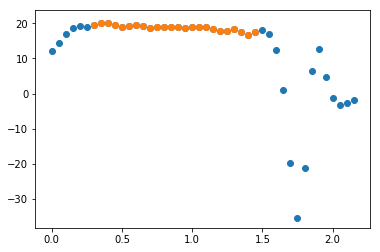

In [48]:
fig, ax = plt.subplots()
ax.scatter(t1, a1)
ax.scatter(t1[good], a1[good])

## Combine all the data.

In [17]:
torque = np.log10([tor1])
alpha = np.log10([meana1])

## Here's a trick to process all the data.

In [68]:
def read_and_get_alpha():
    datafiles = ('5cm_data_200_txt.txt', '1cm_data_100_txt.txt',
                '1cm_data_150_txt.txt', '3cm_data_200_txt.txt')
    tmin = (0.25, 2, 2, 1.5)
    tmax = (1.5, 7, 7, 3.5)
    rad = (0.05, 0.05, 0.012, 0.012, 0.032) # [m]
    mass = (0.2, 0.1, 0.15, 0.2)  # [kg]
    ndata = len(datafiles)

    logtorque = np.zeros(ndata)
    logalpha = np.zeros(ndata)
    logalphaerr = np.zeros(ndata)
    
    for ii, (ff, t1, t2, rr, mm) in enumerate(zip(datafiles, tmin, tmax, rad, mass)):
        filecp = codecs.open(ff, encoding='cp1252')
        time, alpha = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 3])
        good = (time > t1) * (time < t2)
        
        fig, ax = plt.subplots()
        ax.scatter(time, alpha)
        ax.scatter(time[good], alpha[good])        
        
        meanalpha = np.mean(alpha[good])
        sigalpha = np.std(alpha[good]) / np.sqrt(np.count_nonzero(good)-1)
        
        logalpha[ii] = np.log10(meanalpha)
        logalphaerr[ii] = sigalpha / meanalpha / np.log(10)
        
        logtorque[ii] = np.log10(rr * mm * 9.8)
        
    return logtorque, logalpha, logalphaerr

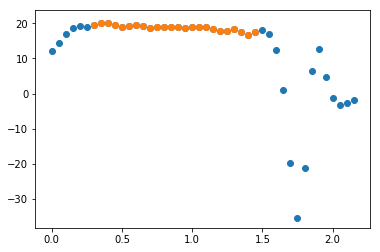

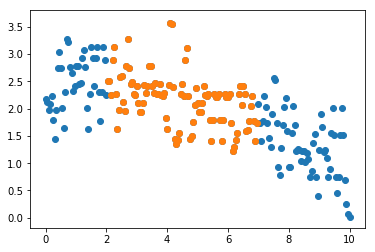

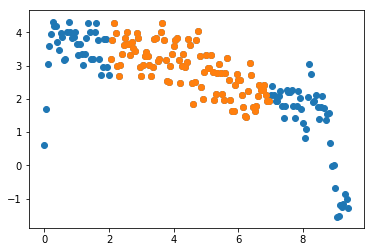

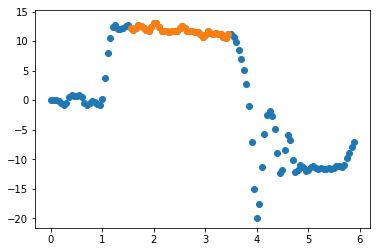

In [69]:
logtorque, logalpha, logalphaerr = read_and_get_alpha()

## Plot alpha vs torque

<Container object of 3 artists>

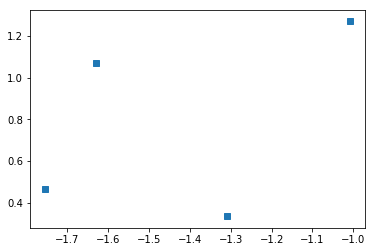

In [70]:
fig, ax = plt.subplots()
ax.errorbar(logtorque, logalpha, logalphaerr, fmt='s')